In [2]:
%pip install pandas numpy seaborn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 329.1 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 835.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 833.2 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 667.5 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 998.7 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("covid_de.csv")

In [7]:
data.head()

,state,county,age_group,gender,date,cases,deaths,recovered
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-27,1,0,1
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-28,1,0,1
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-04-03,1,0,1
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-18,1,0,1
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-22,1,0,1


In [8]:
data.tail()

,state,county,age_group,gender,date,cases,deaths,recovered
2890904,Thueringen,SK Weimar,NaN,F,2021-12-01,1,0,1
2890905,Thueringen,SK Weimar,NaN,F,2021-12-23,1,0,1
2890906,Thueringen,SK Weimar,NaN,F,2022-08-11,1,0,1
2890907,Thueringen,SK Weimar,NaN,F,2022-09-19,1,0,1
2890908,Thueringen,SK Weimar,NaN,NaN,2022-08-24,1,0,1


In [9]:
data.describe()

,cases,deaths,recovered
count,2.890909e+06,2.890909e+06,2.890909e+06
mean,1.307880e+01,5.742692e-02,1.294523e+01
std,2.965920e+01,3.195485e-01,2.967817e+01
min,0.000000e+00,0.000000e+00,-1.000000e+00
25%,2.000000e+00,0.000000e+00,1.000000e+00
50%,4.000000e+00,0.000000e+00,4.000000e+00
75%,1.200000e+01,0.000000e+00,1.200000e+01
max,2.156000e+03,2.100000e+01,2.156000e+03


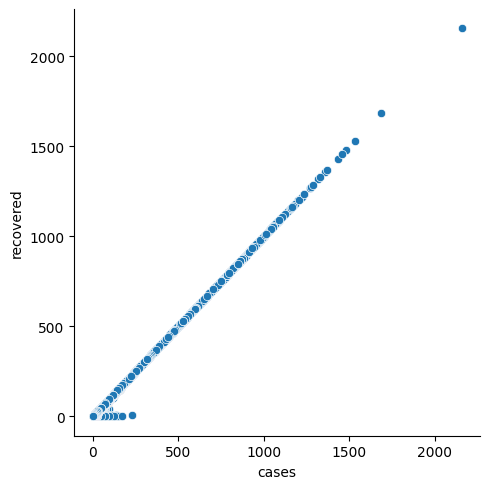

In [10]:
sns.relplot(x="cases", y= "recovered", data=data)

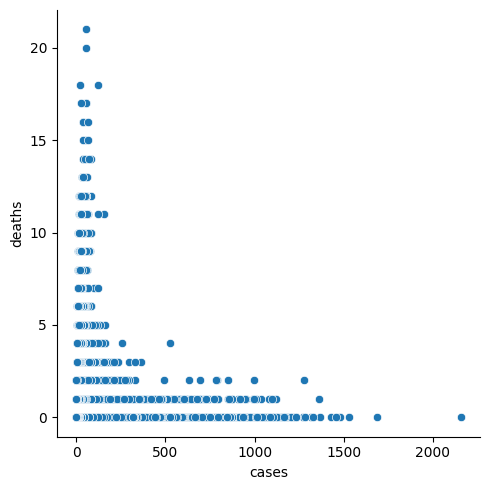

In [11]:
sns.relplot(x="cases", y= "deaths", data=data)

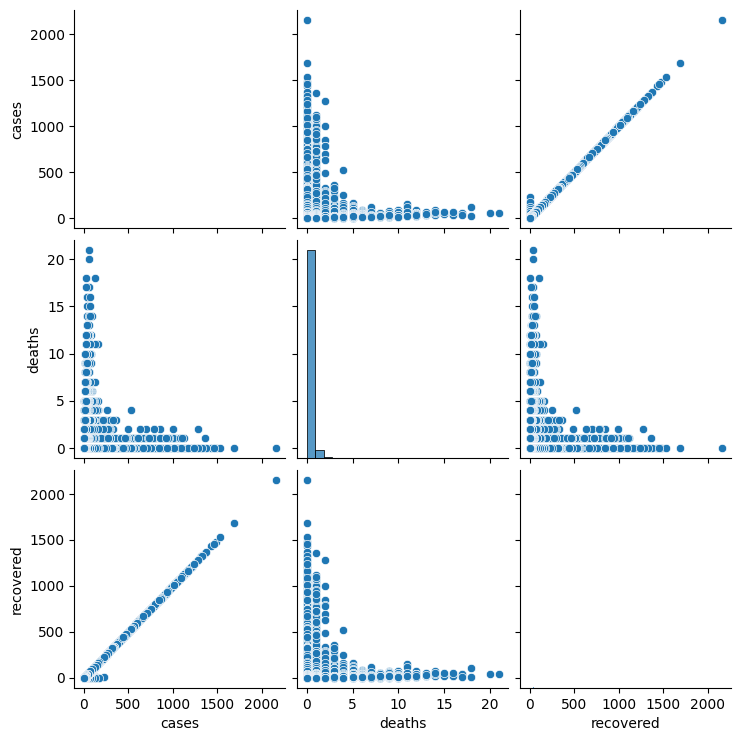

In [12]:
sns.pairplot(data)

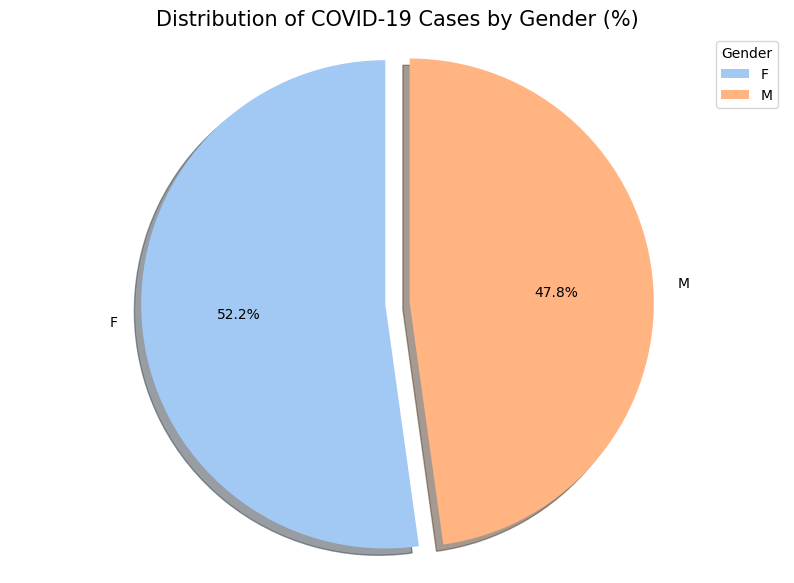

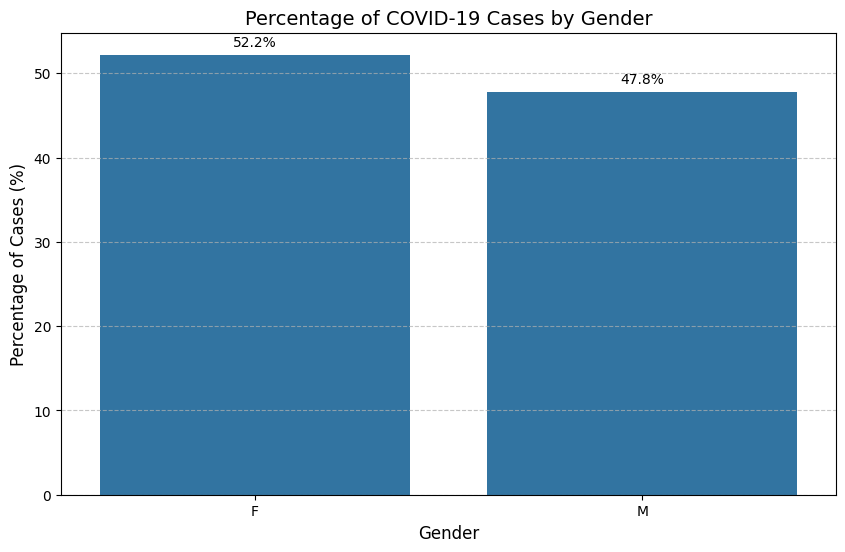

In [14]:
gender_cases = data.groupby('gender')['cases'].sum()

# Create a pie chart showing percentage distribution
plt.figure(figsize=(10, 7))
plt.pie(gender_cases, labels=gender_cases.index, autopct='%1.1f%%', 
        startangle=90, shadow=True, explode=[0.05, 0.05], 
        colors=sns.color_palette('pastel'))
plt.title('Distribution of COVID-19 Cases by Gender (%)', fontsize=15)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.legend(title="Gender")
plt.show()

# Alternative: Bar chart showing percentages
plt.figure(figsize=(10, 6))
gender_pct = gender_cases / gender_cases.sum() * 100
sns.barplot(x=gender_pct.index, y=gender_pct.values)
plt.title('Percentage of COVID-19 Cases by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Percentage of Cases (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(gender_pct.values):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center')
plt.show()

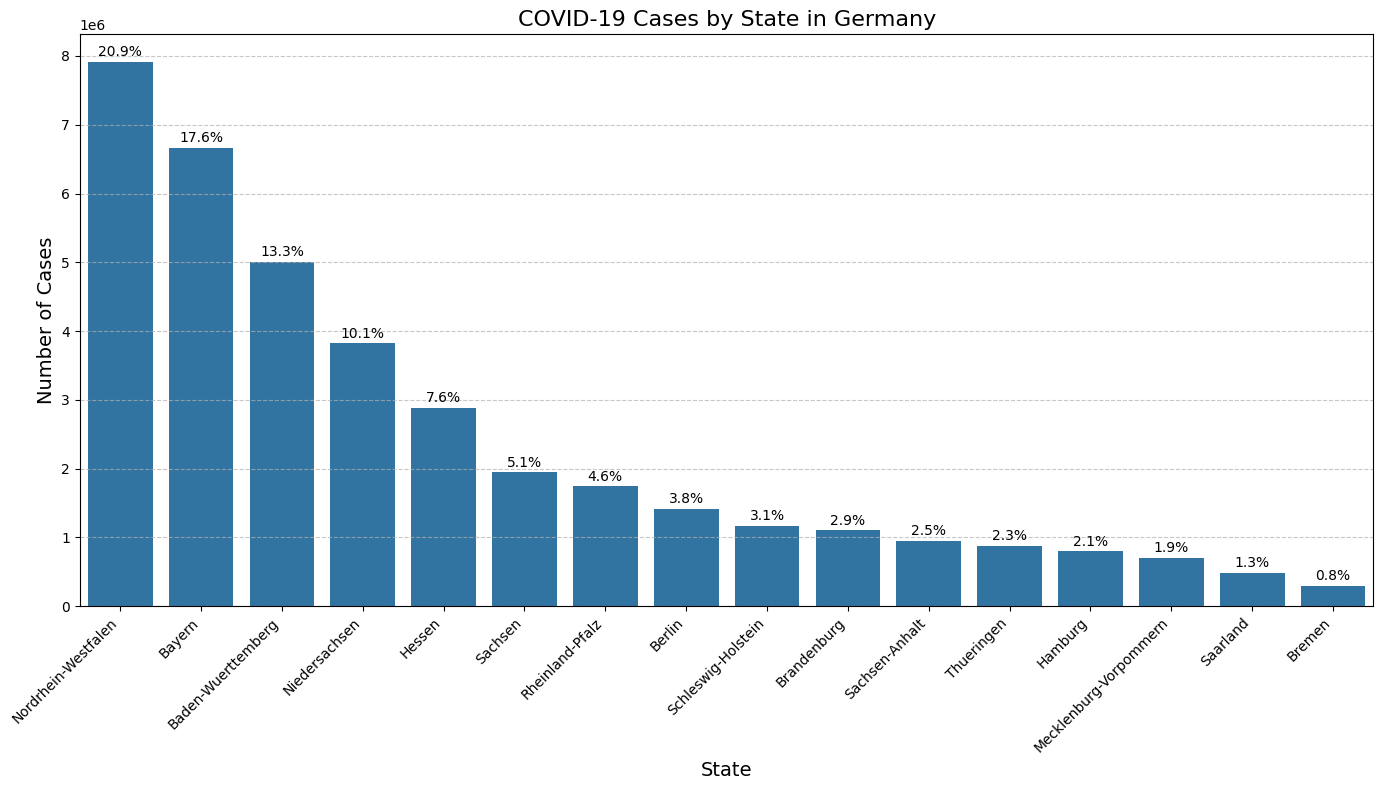

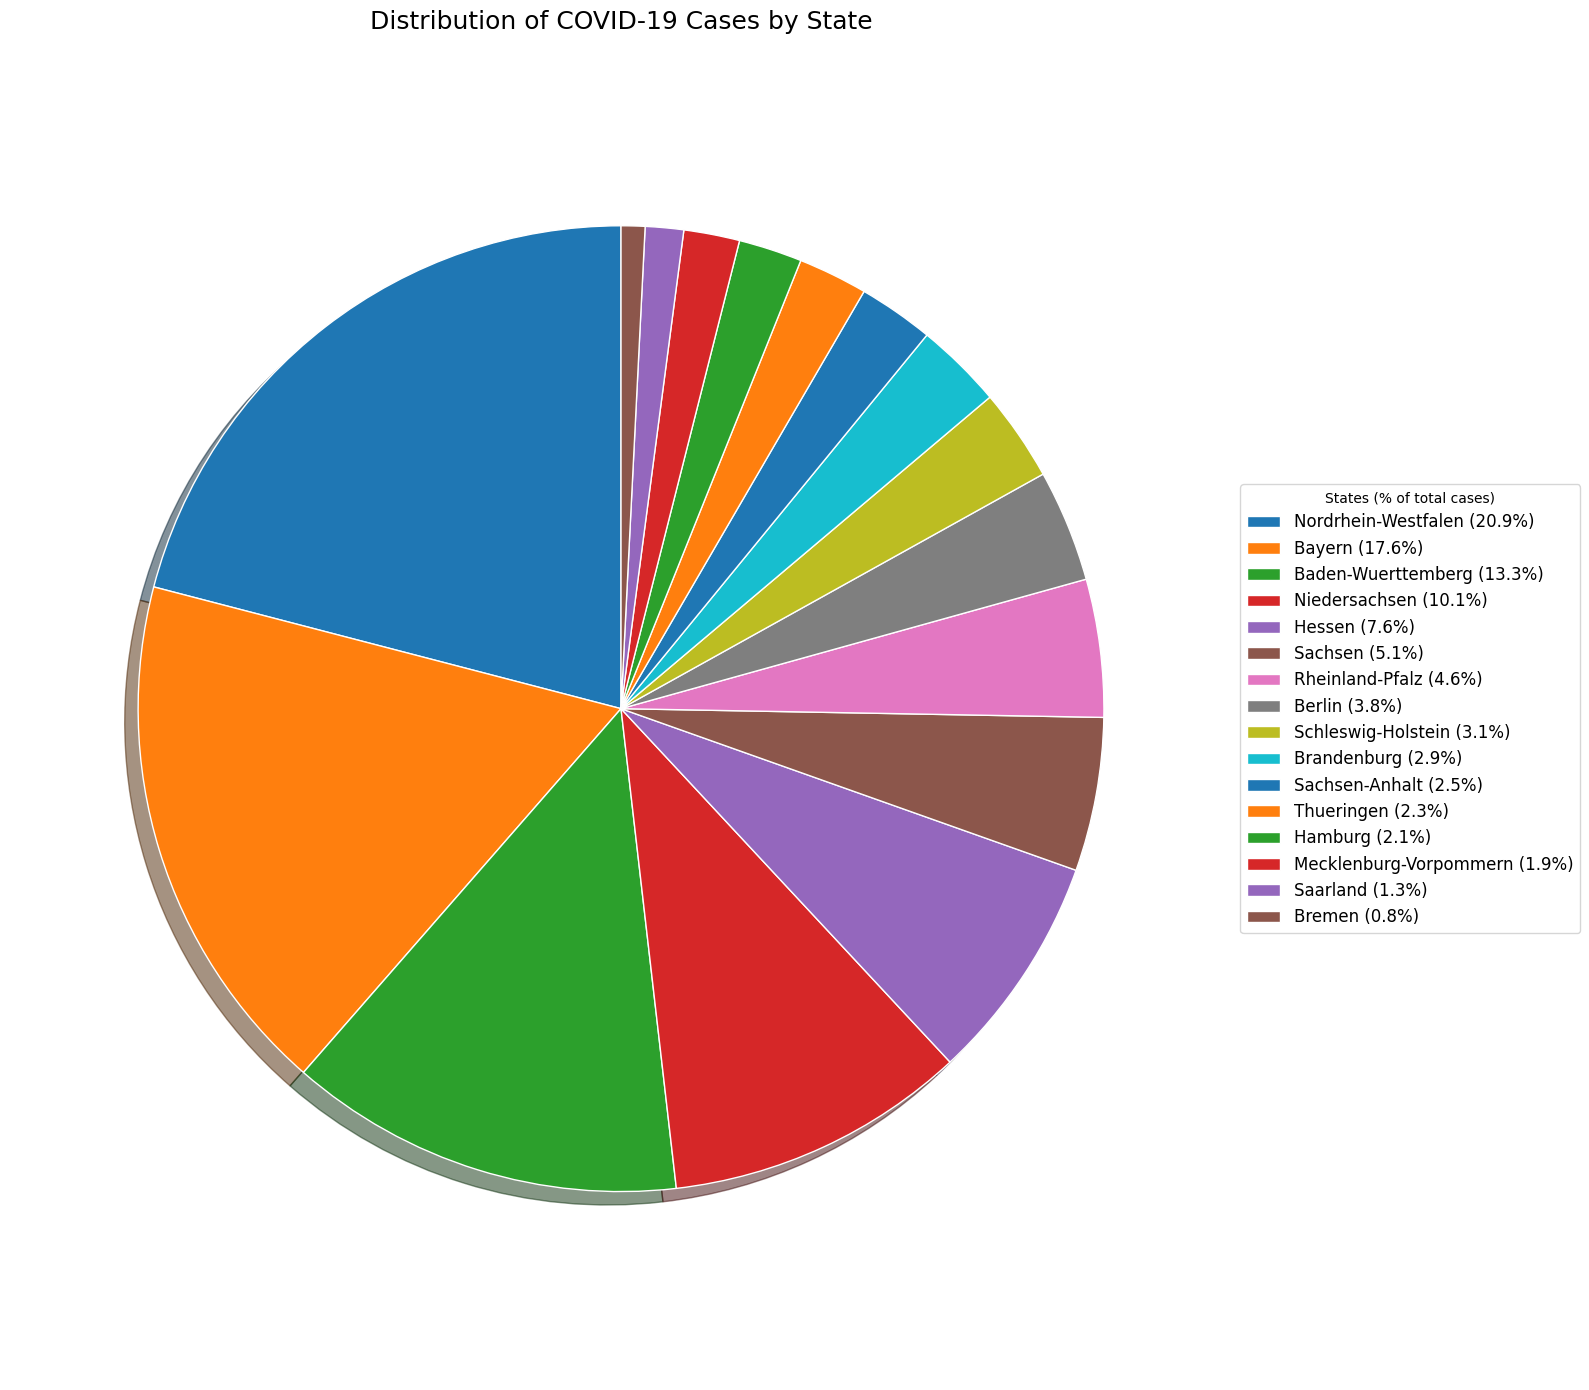

In [17]:
# Group data by state and sum the cases
state_cases = data.groupby('state')['cases'].sum().sort_values(ascending=False)

# Calculate percentage of total cases for each state
state_percentage = (state_cases / state_cases.sum() * 100).round(1)

# Create a bar chart showing case distribution by state
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=state_cases.index, y=state_cases.values)
plt.title('COVID-19 Cases by State in Germany', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Cases', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels
for i, (cases, pct) in enumerate(zip(state_cases.values, state_percentage.values)):
    ax.text(i, cases + (state_cases.max()*0.01), f'{pct}%', ha='center')

plt.tight_layout()
plt.show()

# Create a pie chart
plt.figure(figsize=(16, 14))
plt.pie(state_cases, 
        labels=None,  # No direct labels on the pie
        startangle=90, 
        shadow=True,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

# Create legend labels that include percentages
legend_labels = [f'{state} ({pct}%)' for state, pct in zip(state_cases.index, state_percentage)]

# Add a legend with combined state+percentage labels
plt.legend(legend_labels, 
           title="States (% of total cases)",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1),
           fontsize=12)

plt.title('Distribution of COVID-19 Cases by State', fontsize=18)
plt.axis('equal')
plt.tight_layout()
plt.show()

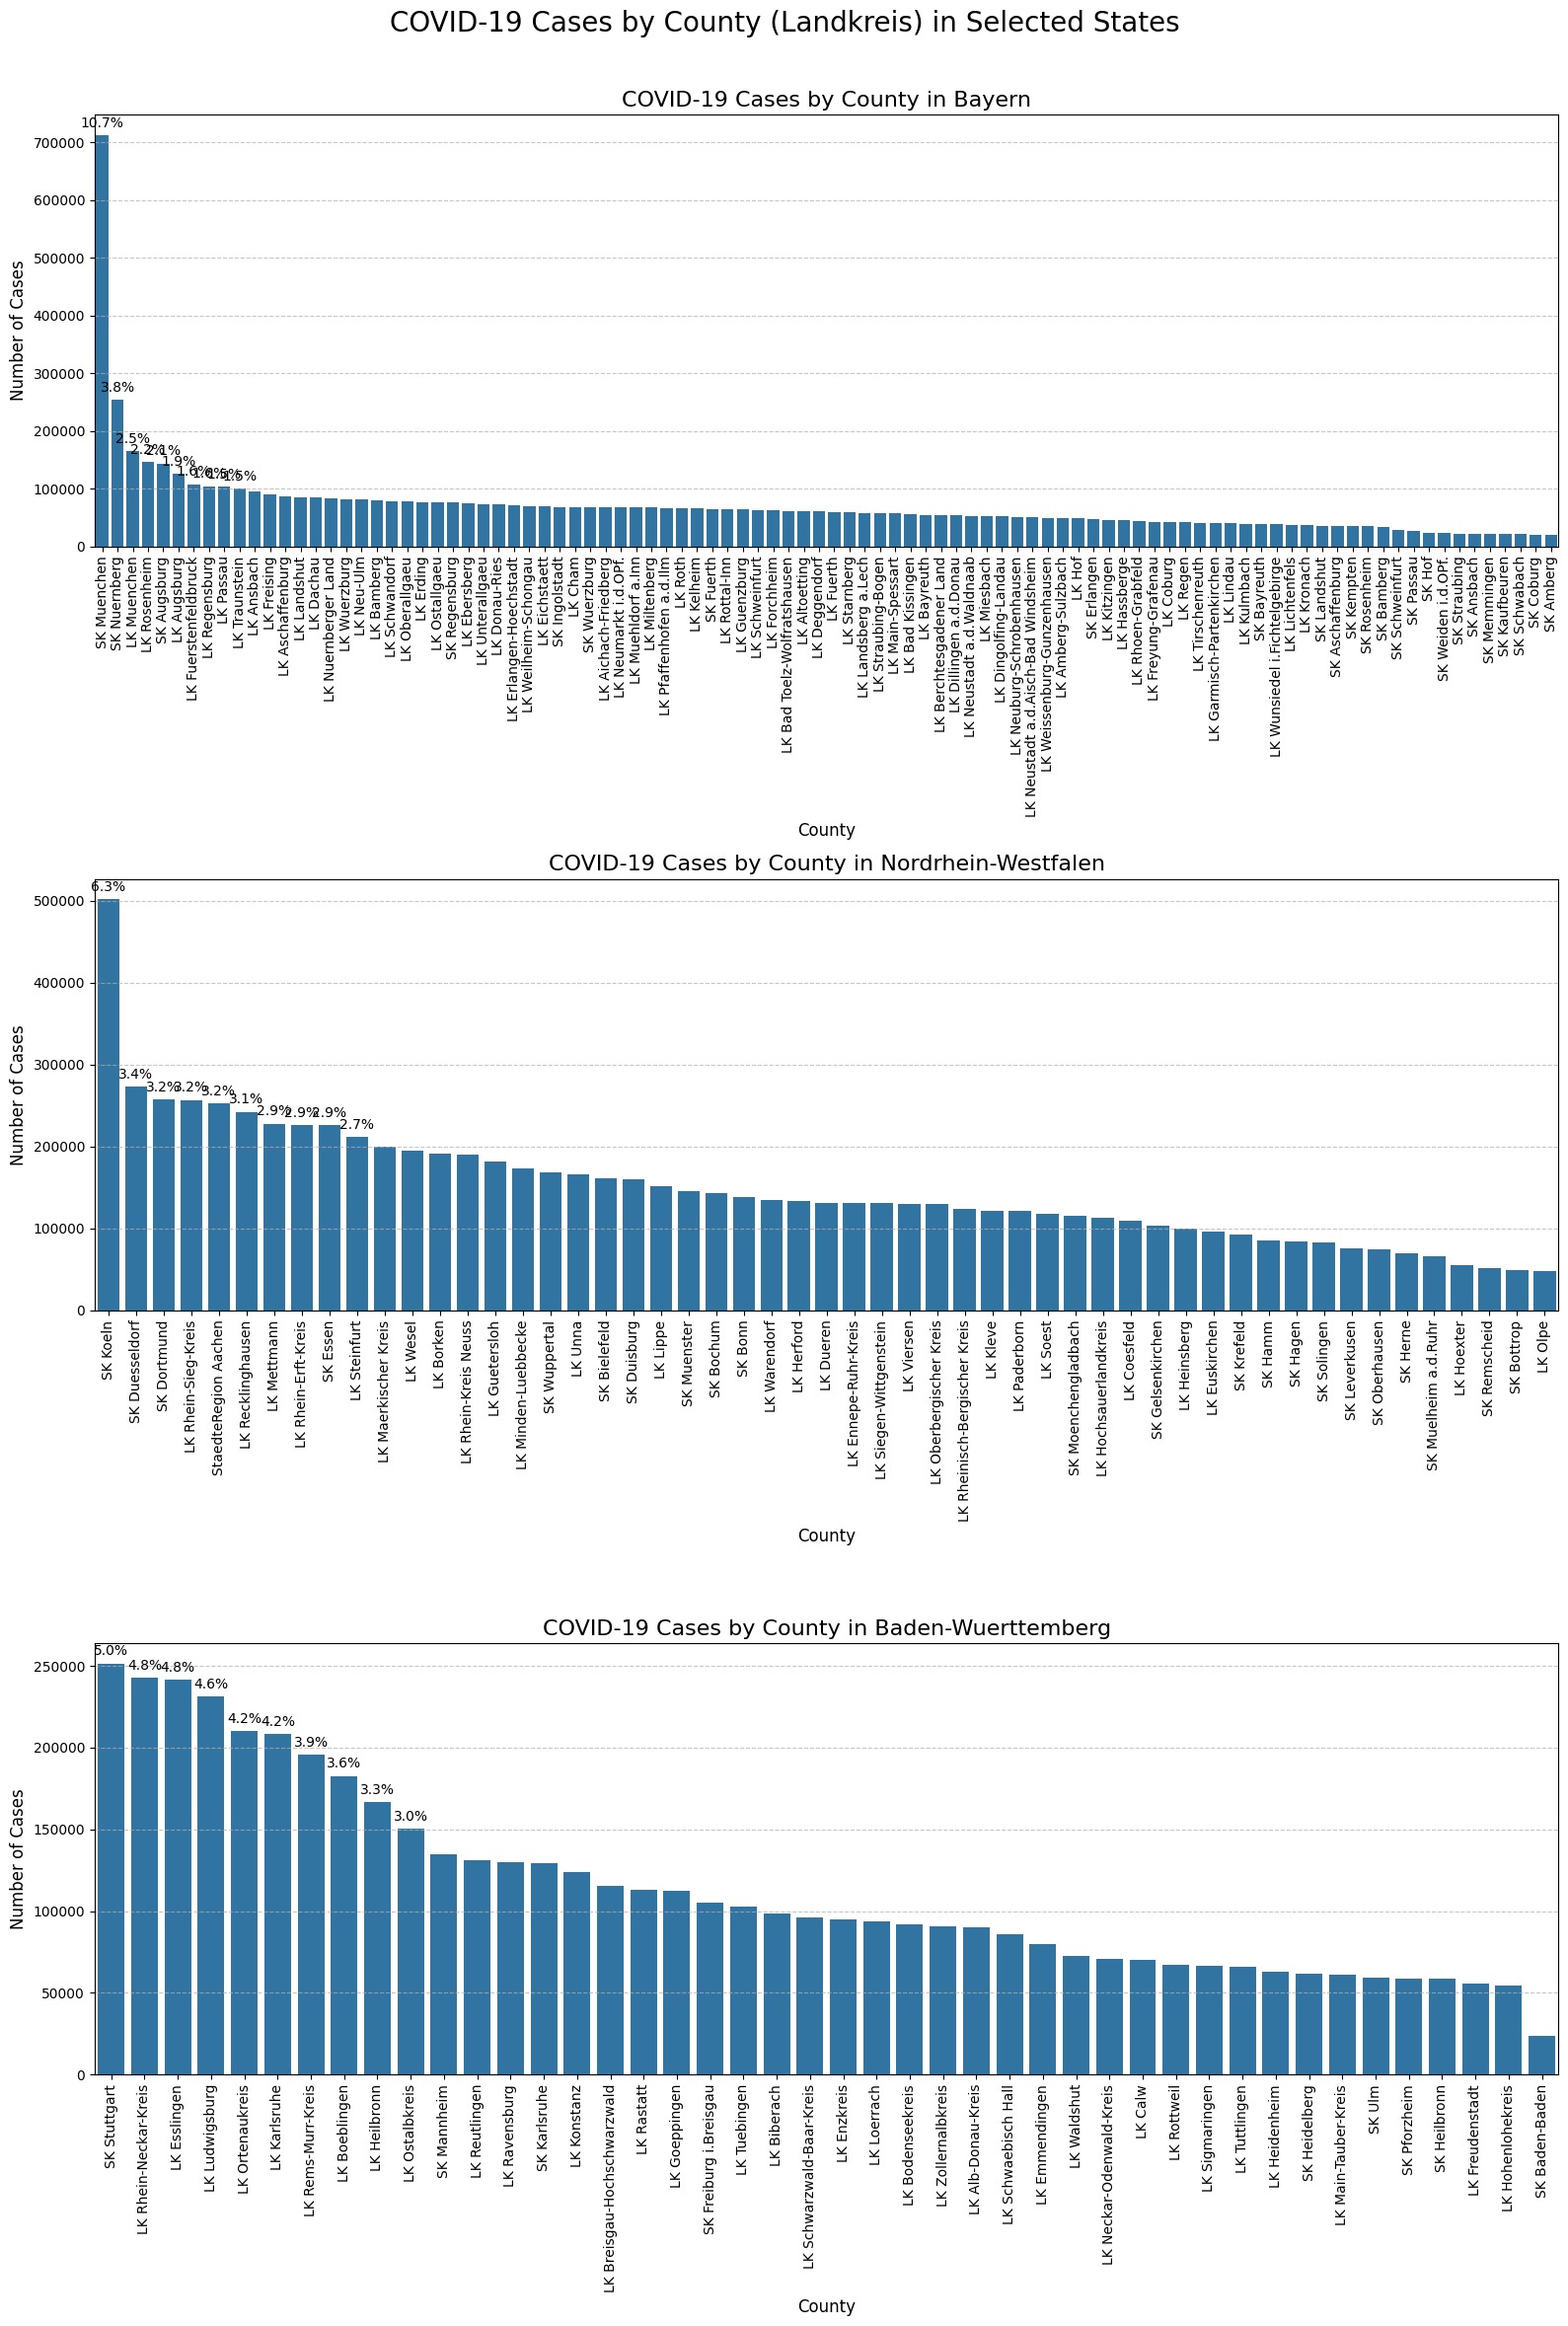

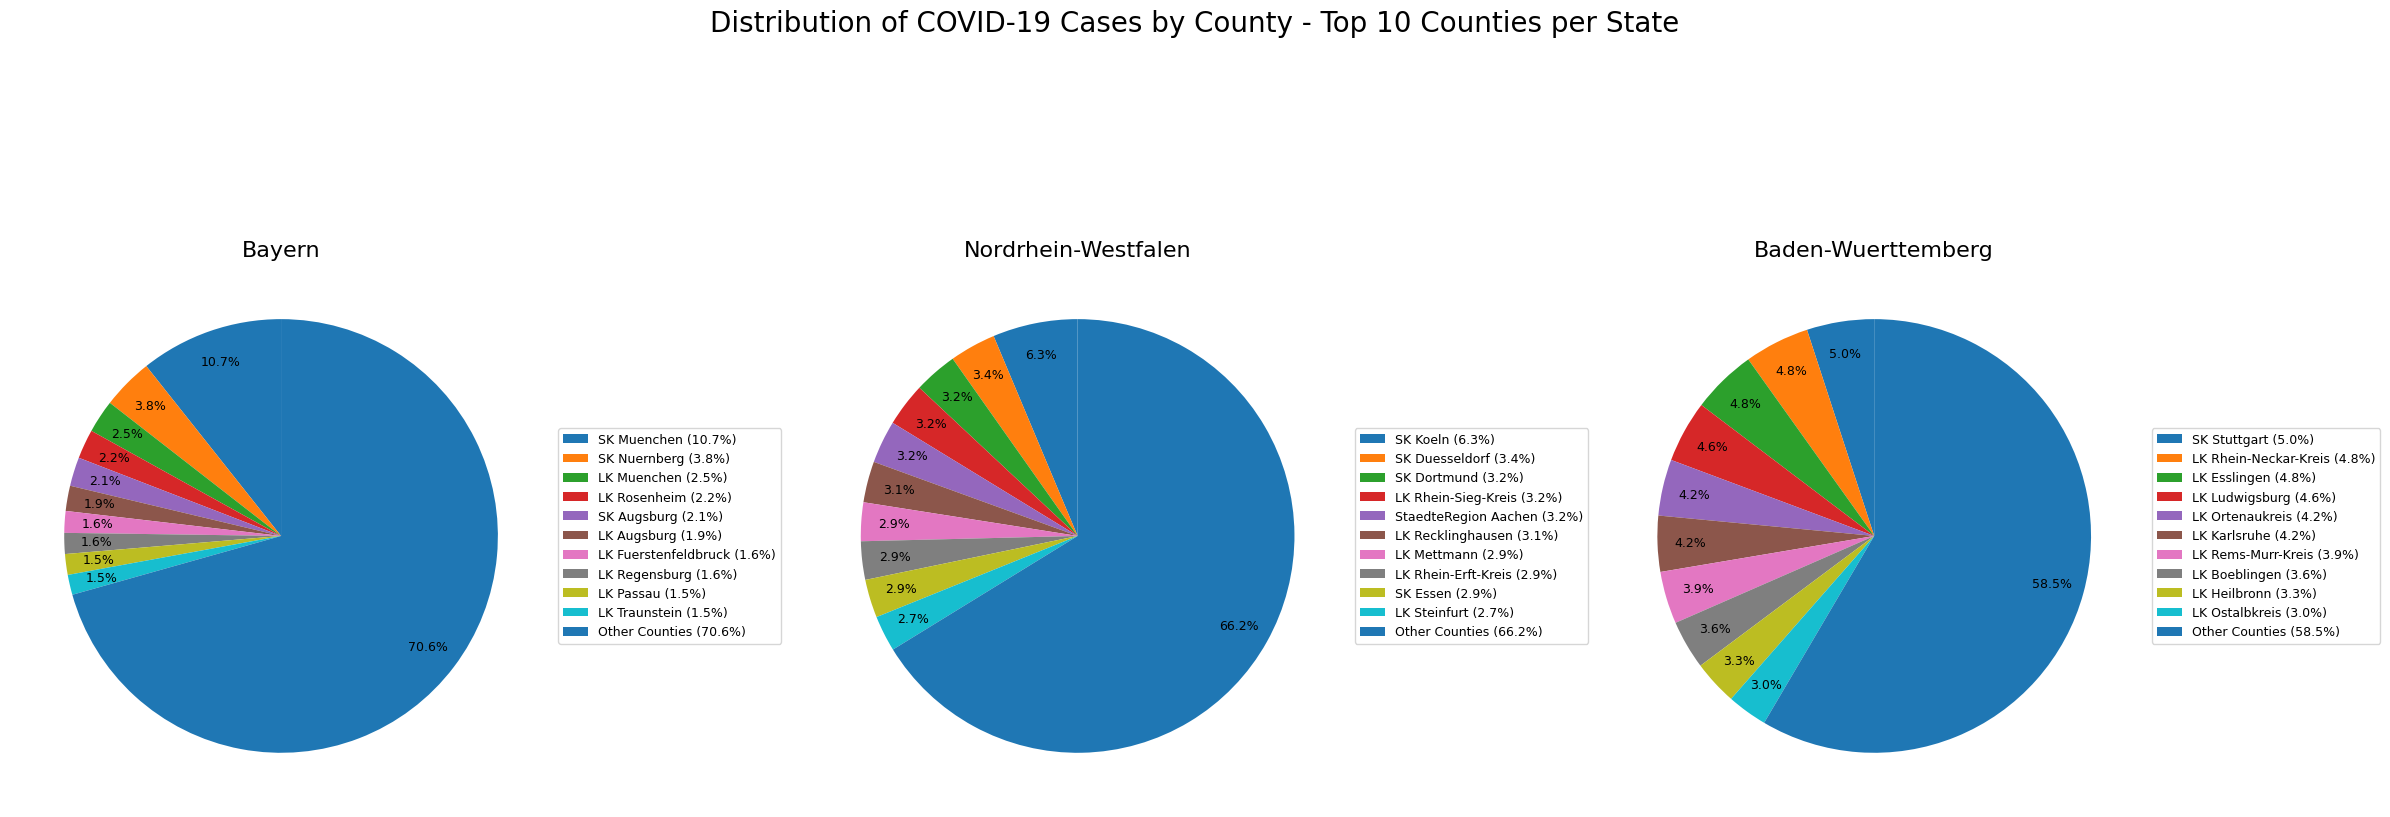

In [19]:
# Define the top 3 covid19 states
selected_states = ['Bayern', 'Nordrhein-Westfalen', 'Baden-Wuerttemberg']

# Filter data for the selected states
filtered_data = data[data['state'].isin(selected_states)]

# Create subplots (one for each state)
fig, axes = plt.subplots(3, 1, figsize=(16, 24))
fig.suptitle('COVID-19 Cases by County (Landkreis) in Selected States', fontsize=20)

# For each state, create a bar chart of cases by county
for i, state in enumerate(selected_states):
    # Get data for this state only
    state_data = filtered_data[filtered_data['state'] == state]
    
    # Group by county and sum cases
    county_cases = state_data.groupby('county')['cases'].sum().sort_values(ascending=False)
    
    # Calculate percentage of total cases in this state
    county_pct = (county_cases / county_cases.sum() * 100).round(1)
    
    # Plot on the corresponding subplot
    sns.barplot(x=county_cases.index, y=county_cases.values, ax=axes[i])
    axes[i].set_title(f'COVID-19 Cases by County in {state}', fontsize=16)
    axes[i].set_xlabel('County', fontsize=12)
    axes[i].set_ylabel('Number of Cases', fontsize=12)
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add percentage text (only for top 10 counties to avoid clutter)
    for j, (cases, pct) in enumerate(list(zip(county_cases.values, county_pct.values))[:10]):
        axes[i].text(j, cases + (county_cases.max()*0.02), f'{pct}%', ha='center')

plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to make room for the suptitle
plt.show()

# Create pie charts for each state showing top 10 counties
fig, axes = plt.subplots(1, 3, figsize=(24, 10))
fig.suptitle('Distribution of COVID-19 Cases by County - Top 10 Counties per State', fontsize=20)

for i, state in enumerate(selected_states):
    # Get data for this state only
    state_data = filtered_data[filtered_data['state'] == state]
    
    # Group by county and sum cases
    county_cases = state_data.groupby('county')['cases'].sum().sort_values(ascending=False)
    
    # Get top 10 counties and group the rest as "Other"
    top_counties = county_cases.head(10)
    if len(county_cases) > 10:
        other_sum = county_cases[10:].sum()
        top_counties['Other Counties'] = other_sum
    
    # Calculate percentages
    county_pct = (top_counties / top_counties.sum() * 100).round(1)
    
    # Plot on the corresponding subplot
    patches, texts, autotexts = axes[i].pie(
        top_counties,
        labels=None,
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.85
    )
    
    # Adjust font size for percentage labels
    plt.setp(autotexts, fontsize=9)
    
    # Add legend
    legend_labels = [f'{county} ({pct}%)' for county, pct in zip(top_counties.index, county_pct)]
    axes[i].legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9)
    axes[i].set_title(f'{state}', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle
plt.show()

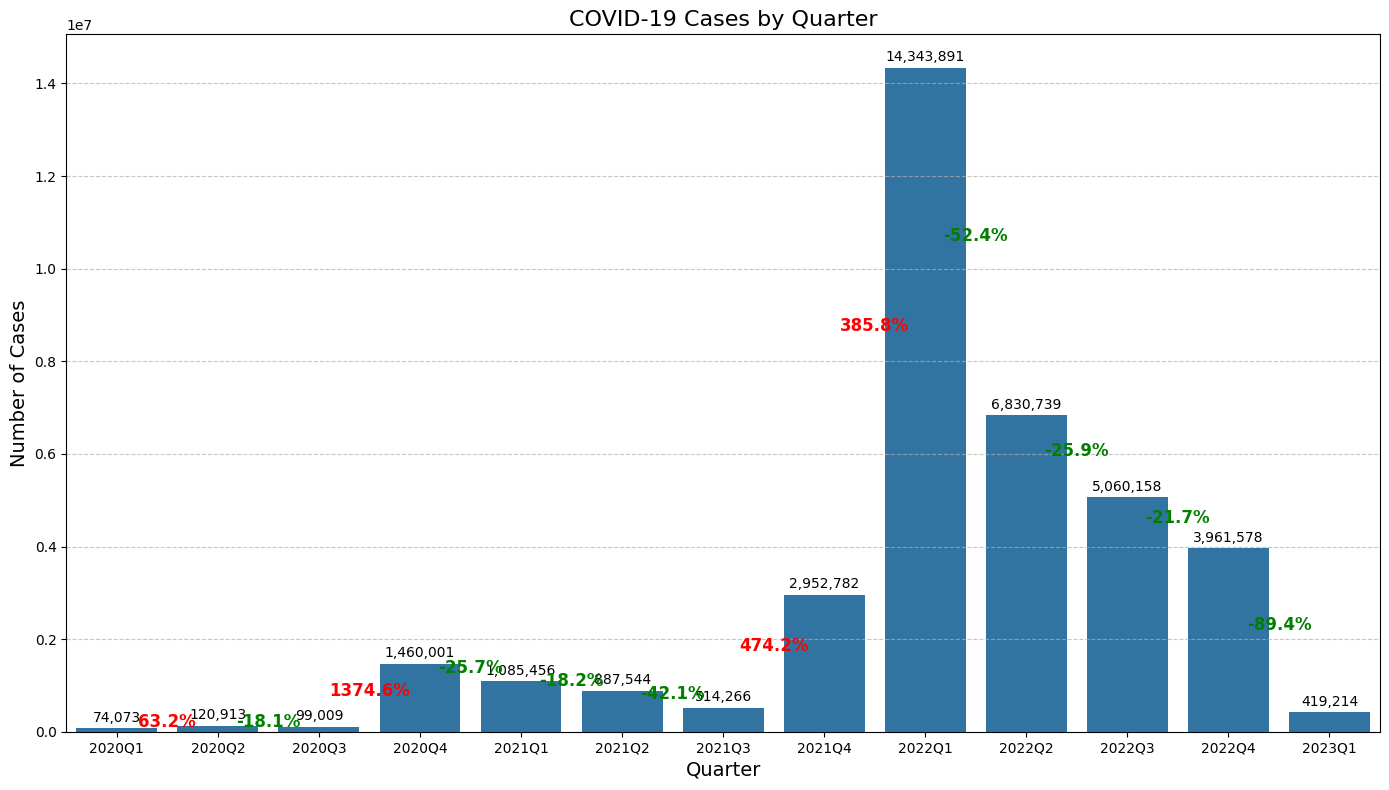

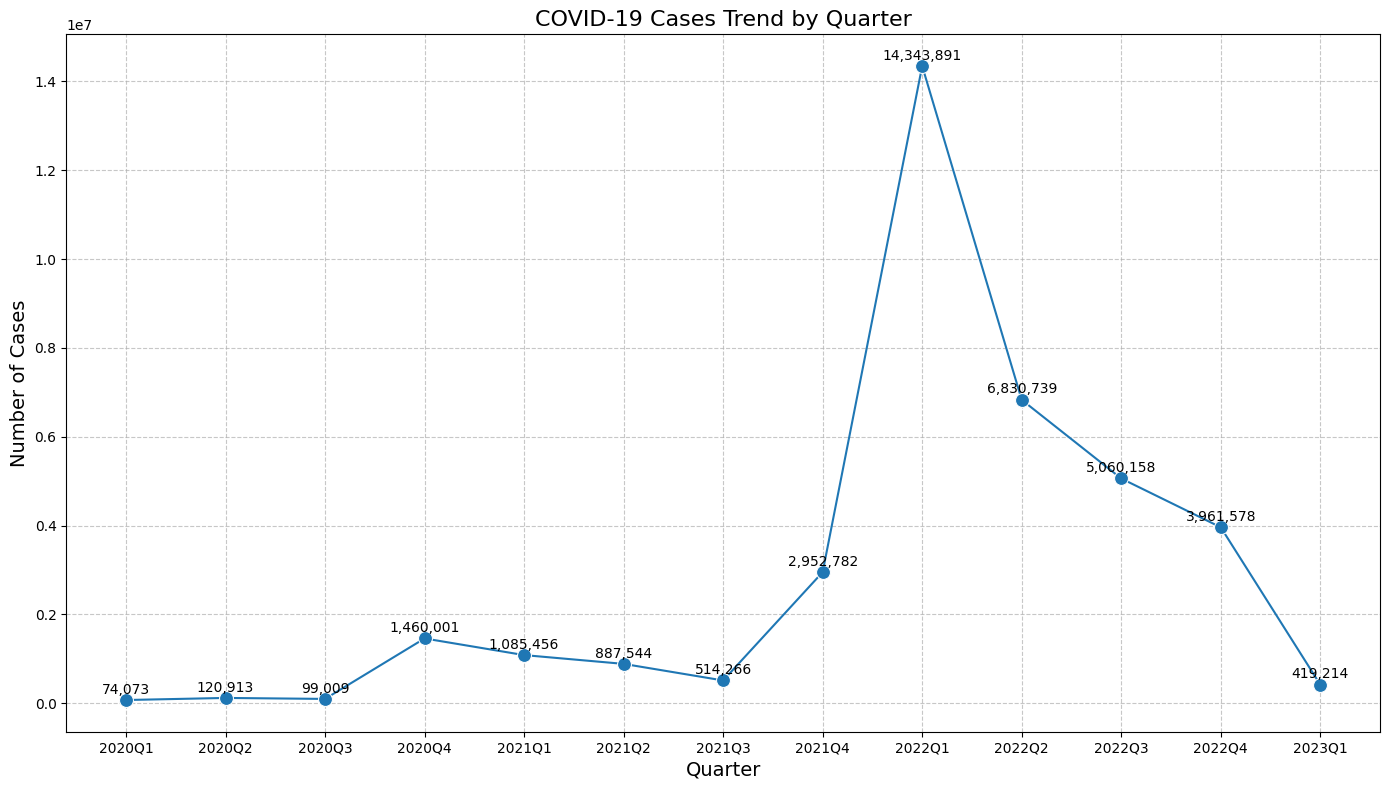

In [20]:
# Ensure date column is in datetime format (if it's not already)
if 'date' in data.columns and not pd.api.types.is_datetime64_any_dtype(data['date']):
    data['date'] = pd.to_datetime(data['date'])

# Extract quarter information
data['quarter'] = data['date'].dt.to_period('Q')

# Group by quarter and sum cases
quarter_cases = data.groupby('quarter')['cases'].sum().reset_index()

# Convert quarter to string for better display
quarter_cases['quarter_str'] = quarter_cases['quarter'].astype(str)

# Create bar chart
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='quarter_str', y='cases', data=quarter_cases)
plt.title('COVID-19 Cases by Quarter', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Number of Cases', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels to bars
for i, v in enumerate(quarter_cases['cases']):
    ax.text(i, v + (quarter_cases['cases'].max()*0.01), f'{v:,}', ha='center')

# Calculate percentage change between quarters
quarter_cases['pct_change'] = quarter_cases['cases'].pct_change() * 100

# Add percentage change annotations
for i in range(1, len(quarter_cases)):
    pct = quarter_cases.loc[i, 'pct_change']
    if not pd.isna(pct):
        y_pos = quarter_cases.loc[i-1:i, 'cases'].mean()
        arrow_text = f"{pct:.1f}%" if pct >= 0 else f"{pct:.1f}%"
        arrow_color = 'red' if pct >= 0 else 'green'
        plt.annotate(
            arrow_text, 
            xy=(i-0.5, y_pos),
            xytext=(0, 0), 
            textcoords='offset points',
            color=arrow_color,
            fontweight='bold',
            fontsize=12,
            ha='center'
        )

plt.tight_layout()
plt.show()

# Line chart alternative
plt.figure(figsize=(14, 8))
sns.lineplot(x='quarter_str', y='cases', data=quarter_cases, marker='o', markersize=10)
plt.title('COVID-19 Cases Trend by Quarter', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Number of Cases', fontsize=14)
plt.grid(linestyle='--', alpha=0.7)

# Add value annotations to line points
for i, v in enumerate(quarter_cases['cases']):
    plt.text(i, v + (quarter_cases['cases'].max()*0.01), f'{v:,}', ha='center')

plt.tight_layout()
plt.show()

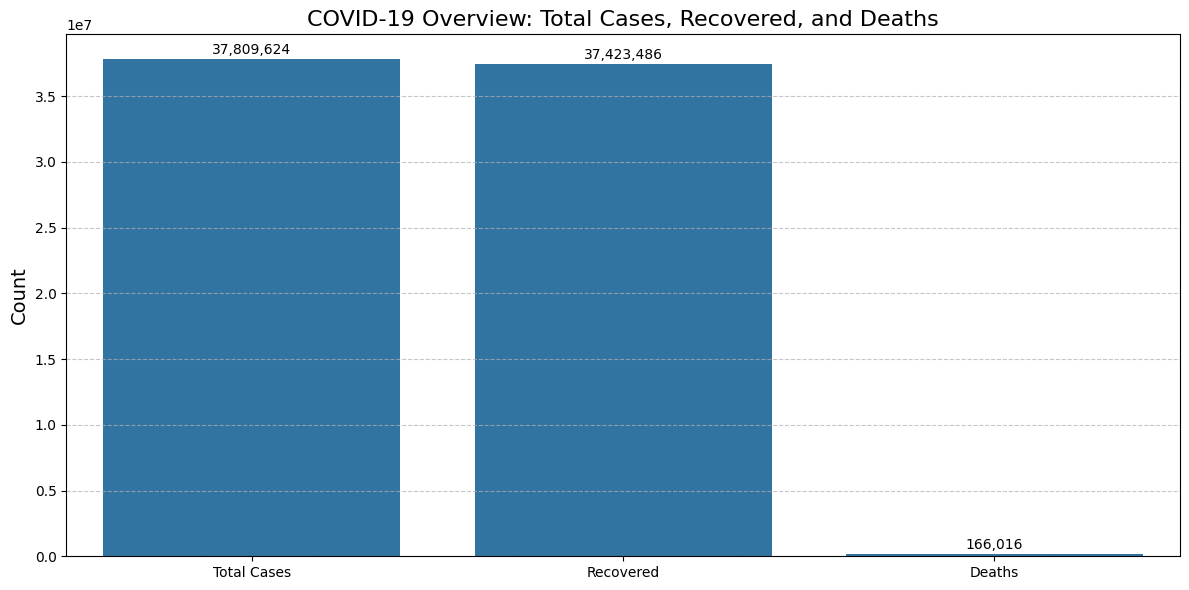

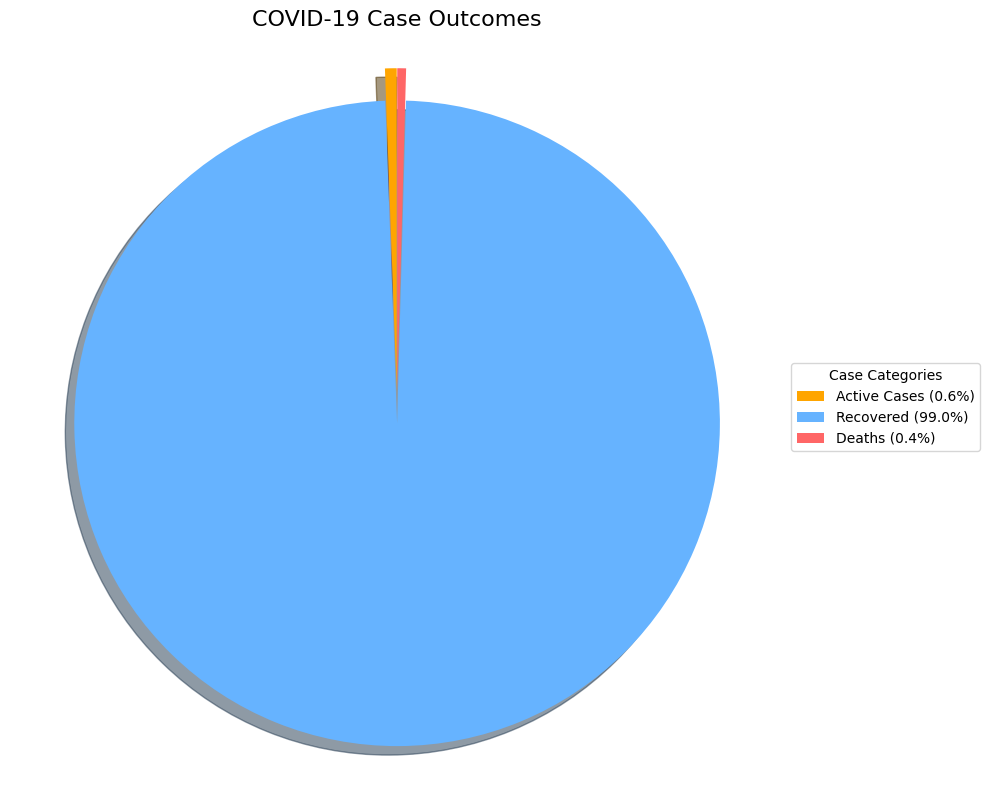

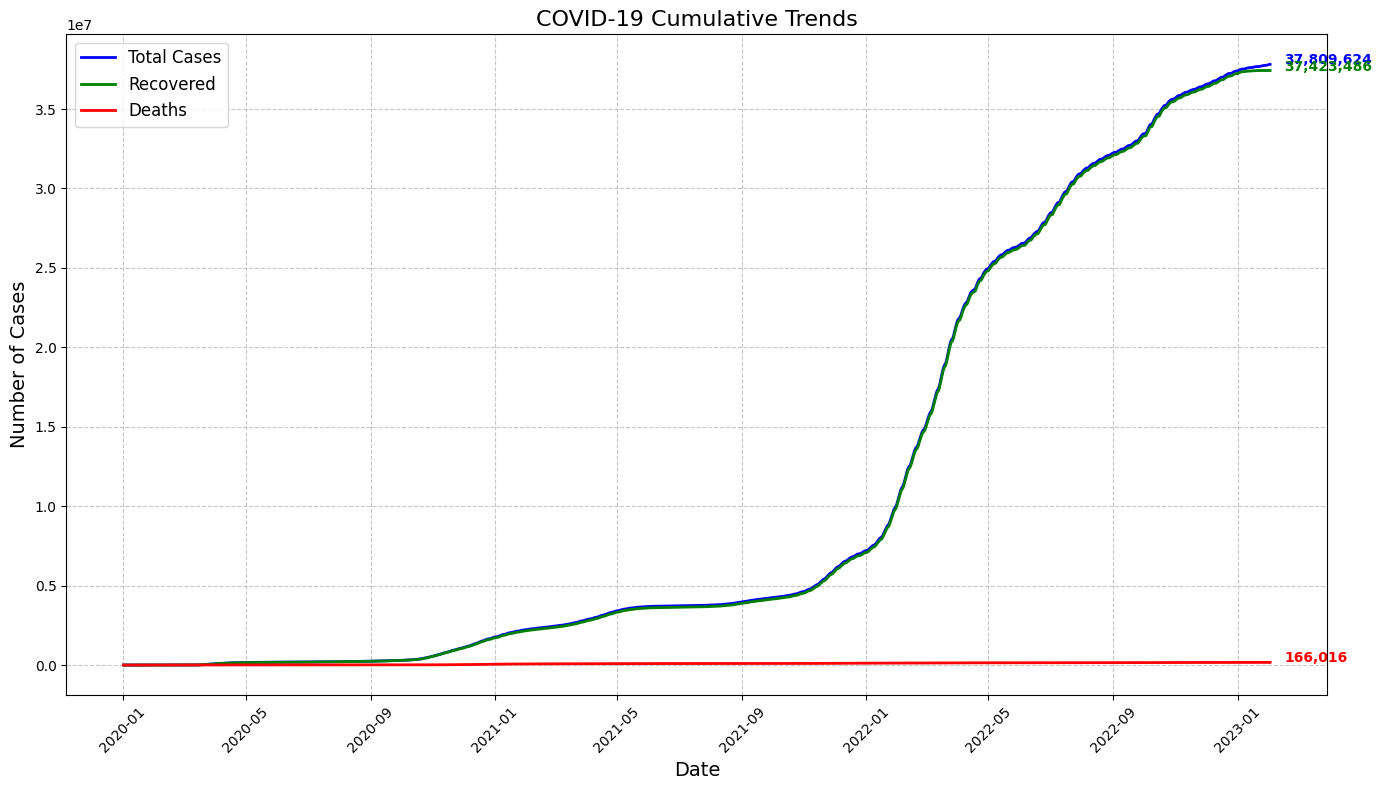

In [24]:
# Calculate totals
total_cases = data['cases'].sum()
total_recovered = data['recovered'].sum()
total_deaths = data['deaths'].sum()

# 1. Bar Chart Comparison
labels = ['Total Cases', 'Recovered', 'Deaths']
values = [total_cases, total_recovered, total_deaths]

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=labels, y=values)
plt.title('COVID-19 Overview: Total Cases, Recovered, and Deaths', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on bars
for i, v in enumerate(values):
    ax.text(i, v + (max(values)*0.01), f'{v:,}', ha='center')

plt.tight_layout()
plt.show()

# 2. Pie Chart with fixed overlapping percentages
labels = ['Active Cases', 'Recovered', 'Deaths']
active_cases = total_cases - total_recovered - total_deaths
values = [active_cases, total_recovered, total_deaths]
colors = ['#FFA500', '#66b3ff', '#ff6666']

plt.figure(figsize=(10, 8))
# Create pie chart without direct labels
wedges, texts = plt.pie(
    values,
    labels=None,  # No labels on the pie
    startangle=90,
    colors=colors,
    explode=[0.05, 0.05, 0.05],
    shadow=True
)

# Create legend with percentages
percentages = [f'{100*v/sum(values):.1f}%' for v in values]
legend_labels = [f'{l} ({p})' for l, p in zip(labels, percentages)]
plt.legend(wedges, legend_labels, title="Case Categories", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title('COVID-19 Case Outcomes', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

# 3. Enhanced time series visualization
if 'date' in data.columns:
    # Convert date to datetime if needed
    if not pd.api.types.is_datetime64_any_dtype(data['date']):
        data['date'] = pd.to_datetime(data['date'])
    
    # Group by date
    daily_data = data.groupby('date').agg({
        'cases': 'sum',
        'recovered': 'sum',
        'deaths': 'sum'
    }).reset_index()
    
    # Create cumulative sums
    daily_data['cumulative_cases'] = daily_data['cases'].cumsum()
    daily_data['cumulative_recovered'] = daily_data['recovered'].cumsum()
    daily_data['cumulative_deaths'] = daily_data['deaths'].cumsum()
    
    # Plot trends with distinct colors and markers
    plt.figure(figsize=(14, 8))
    
    # Plot with distinct colors
    plt.plot(daily_data['date'], daily_data['cumulative_cases'], 'b-', linewidth=2, label='Total Cases')
    plt.plot(daily_data['date'], daily_data['cumulative_recovered'], 'g-', linewidth=2, label='Recovered')
    plt.plot(daily_data['date'], daily_data['cumulative_deaths'], 'r-', linewidth=2, label='Deaths')
    
    # Add annotations for the final values
    last_date = daily_data['date'].iloc[-1]
    last_cases = daily_data['cumulative_cases'].iloc[-1]
    last_recovered = daily_data['cumulative_recovered'].iloc[-1]
    last_deaths = daily_data['cumulative_deaths'].iloc[-1]
    
    plt.annotate(f'{last_cases:,}', xy=(last_date, last_cases), xytext=(10, 0), 
                 textcoords='offset points', color='blue', fontweight='bold')
    plt.annotate(f'{last_recovered:,}', xy=(last_date, last_recovered), xytext=(10, 0), 
                 textcoords='offset points', color='green', fontweight='bold')
    plt.annotate(f'{last_deaths:,}', xy=(last_date, last_deaths), xytext=(10, 0), 
                 textcoords='offset points', color='red', fontweight='bold')
    
    # Improve labels and formatting
    plt.title('COVID-19 Cumulative Trends', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Number of Cases', fontsize=14)
    plt.grid(linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()